In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_gs98 = pd.read_csv('fgong_AGSS09_d_22c.txt', delimiter=' ', skiprows=7)
data_gs98.reset_index(inplace=True)
data_gs98.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [3]:
df1=data_gs98.fillna(0)
df=df1.drop('a', axis='columns')
df.b = df.b + df.c
df.d = df.d + df.e
df.f = df.f + df.g
df.h = df.h + df.i
df.j = df.j + df.k

In [4]:
df = df.drop(['c', 'e', 'g', 'i', 'k'], axis='columns')

In [5]:
radius = df.iloc[::5, :].b
lnq = df.iloc[::5, :].d
temperature = df.iloc[::5, :].f
pressure = df.iloc[::5, :].h
density = df.iloc[::5, :].j

X_hydrogen = df.iloc[1::5, :].b
Luminosity = df.iloc[1::5, :].d
opacity = df.iloc[1::5, :].f
energy_generation = df.iloc[1::5, :].h
Gamma_1 = df.iloc[1::5, :].j

Adiabatic_Gradient = df.iloc[2::5, :].b
delta = df.iloc[2::5, :].d
cp = df.iloc[2::5, :].f
inverse_mu_e = df.iloc[2::5, :].h
weird_num = df.iloc[2::5, :].j

rx = df.iloc[3::5, :].b
Z_heavy_element = df.iloc[3::5, :].d
R_minus_r = df.iloc[3::5, :].f
epsilon_g = df.iloc[3::5, :].h
Lg = df.iloc[3::5, :].j

He_3 = df.iloc[4::5, :].b
Carbon_12 = df.iloc[4::5, :].d
Carbon_13 = df.iloc[4::5, :].f
N_14 = df.iloc[4::5, :].h
O_16 = df.iloc[4::5, :].j

In [6]:
df_final = pd.DataFrame(list(zip(radius, lnq, temperature, pressure, density,
                                  X_hydrogen, Luminosity, opacity, energy_generation,
                                  Gamma_1, Adiabatic_Gradient, delta, cp, inverse_mu_e,
                                  weird_num, rx, Z_heavy_element, R_minus_r, epsilon_g,
                                  Lg, He_3, Carbon_12, Carbon_13, N_14, O_16)),
                       columns =['radius', 'lnq', 'temperature', 'pressure',
                                'density', 'X_hydrogen', 'Luminosity', 'opacity', 
                                'energy_generation', 'Gamma_1', 'Adiabatic_Gradient', 'delta', 'cp', 'inverse_mu_e',
                                  'weird_num', 'rx', 'Z_heavy_element', 'R_minus_r', 'epsilon_g',
                                  'Lg', 'He_3', 'Carbon_12', 'Carbon_13', 'N_14', 'O_16' ])

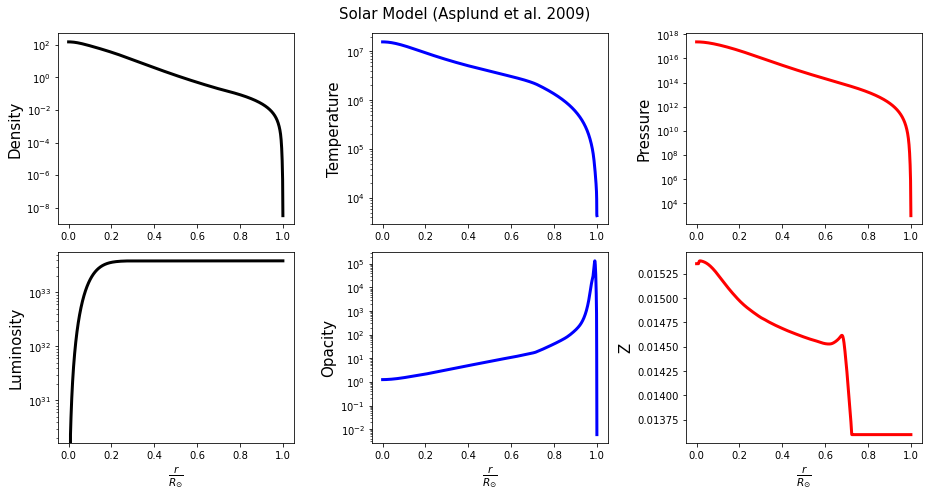

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(13,7))

ax1.plot(radius/max(radius), density, linewidth=3, color='black')
ax1.set_yscale('log')
#ax1.set_xlabel(r"$\phi$", fontsize=15)
ax1.set_ylabel('Density', fontsize=15)

ax2.plot(radius/max(radius), temperature, linewidth=3, color='blue')
ax2.set_yscale('log')
#ax2.set_xlabel('R/Rsun', fontsize=15)
ax2.set_ylabel('Temperature', fontsize=15)

ax3.plot(radius/max(radius), pressure, linewidth=3, color='red')
ax3.set_yscale('log')
#ax3.set_xlabel('R/Rsun', fontsize=15)
ax3.set_ylabel('Pressure', fontsize=15)

ax4.plot(radius/max(radius), Luminosity, linewidth=3, color='black')
ax4.set_yscale('log')
ax4.set_xlabel(r'$\frac{r}{R_{\odot}}$', fontsize=15)
ax4.set_ylabel('Luminosity', fontsize=15)

ax5.plot(radius/max(radius), opacity, linewidth=3, color='blue')
ax5.set_yscale('log')
ax5.set_xlabel(r'$\frac{r}{R_{\odot}}$', fontsize=15)
ax5.set_ylabel('Opacity', fontsize=15)

ax6.plot(radius/max(radius), Z_heavy_element, linewidth=3, color='red')
#ax6.set_yscale('log')
ax6.set_xlabel(r'$\frac{r}{R_{\odot}}$', fontsize=15)
ax6.set_ylabel('Z', fontsize=15)

fig.suptitle('Solar Model (Asplund et al. 2009)', fontsize=15)
fig.tight_layout()
plt.savefig('SolarModel_JCD_AGSS09.png', dpi=300)
plt.show()